# Análise Detalhada da Frota de Veículos da Prefeitura Municipal de Capelinha/MG: Composição, propriedade e tendência

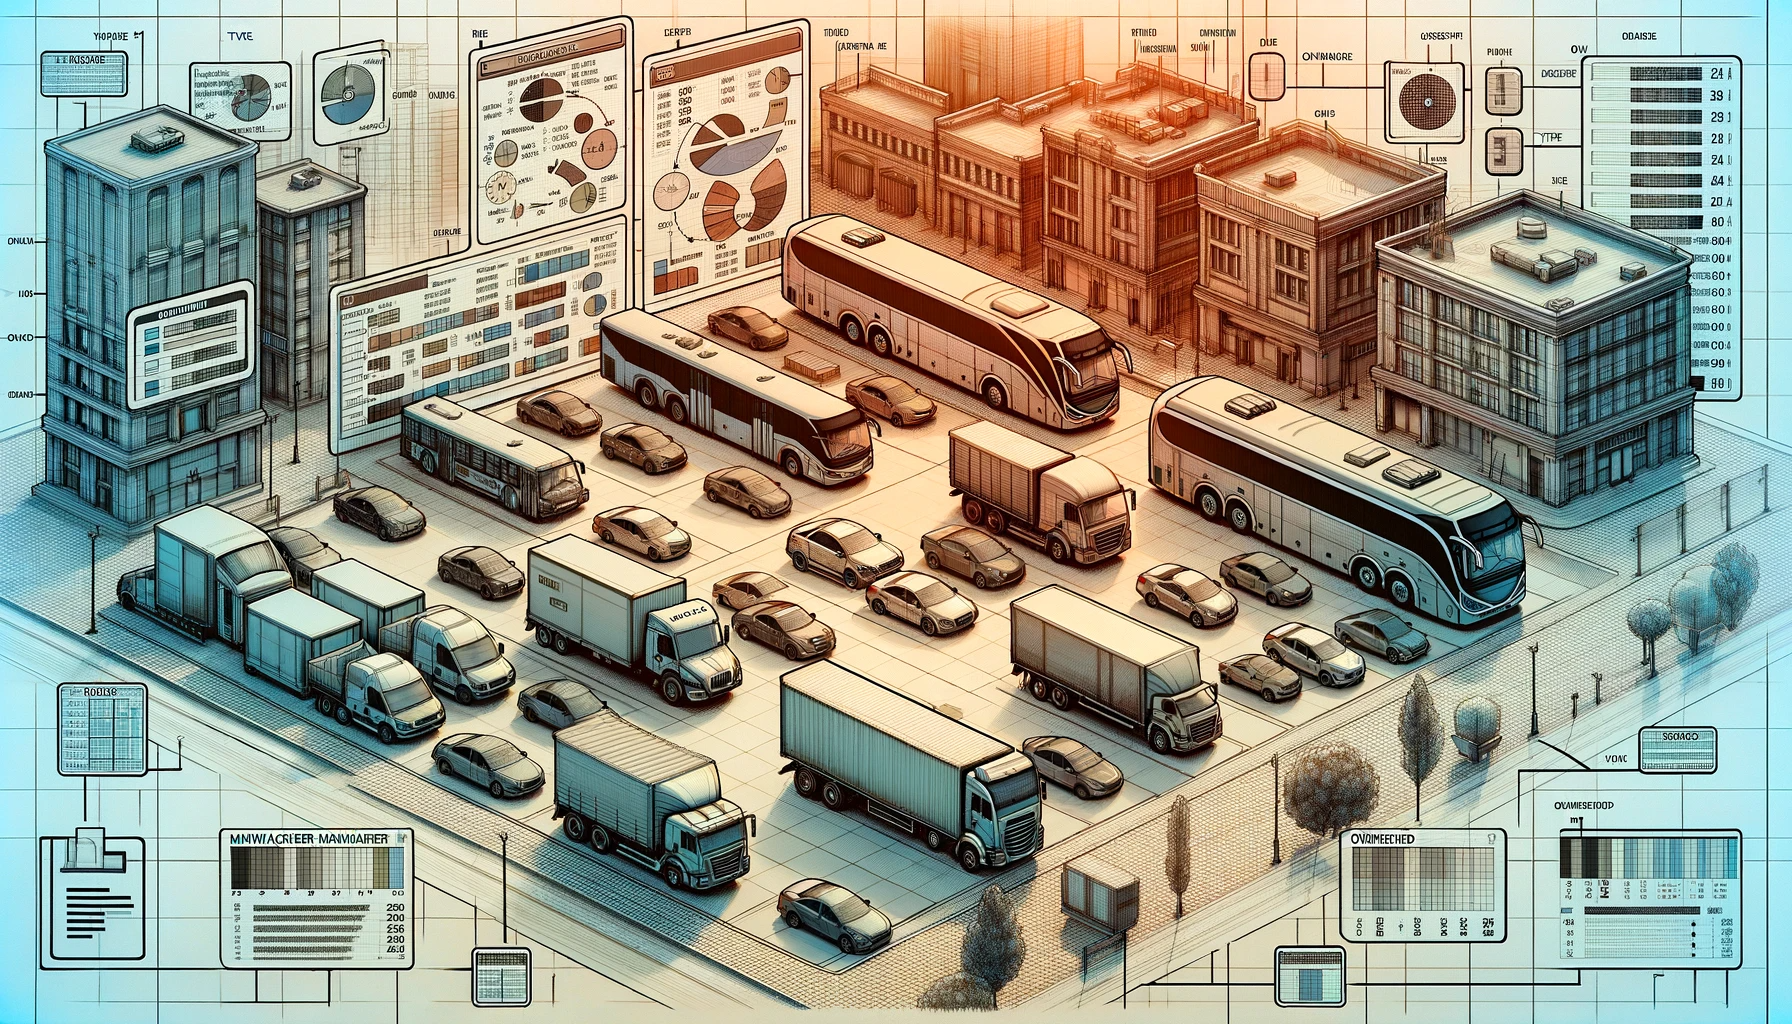

Este estudo realiza uma análise exploratória abrangente da frota de veículos em uso pela Prefeitura Municipal de Capelinha, Minas Gerais. Diante da necessidade de compreender melhor a composição e as características dos veículos que servem à administração pública municipal, este trabalho busca detalhar aspectos fundamentais como fabricante, modelo, ano de fabricação, bem como categorizar os veículos quanto ao seu tipo, subtipo e a situação de posse (se são próprios ou alugados).

A relevância dessa análise reside na possibilidade de fornecer insights valiosos para a gestão municipal, especialmente em termos de eficiência operacional, planejamento financeiro e atendimento às necessidades de transporte da administração. Ao examinar detalhadamente a composição da frota, podemos identificar padrões, tendências e potenciais áreas para melhorias, seja na renovação dos veículos, na adequação do uso à finalidade ou na otimização de custos relacionados à manutenção e locação.

Este documento apresenta os resultados dessa análise exploratória, oferecendo uma visão clara da situação atual da frota de veículos da Prefeitura Municipal de Capelinha e sugerindo caminhos para tomadas de decisão mais informadas e eficientes no que tange à gestão de transporte municipal.

## Importando bibliotecas

In [1]:
# Pandas: Data manipulation and analysis library.
# https://pandas.pydata.org
try:
    import pandas as pd
except ModuleNotFoundError:
    print('Pandas is not installed, installing now...')
    %pip install pandas
finally:
    import pandas as pd

In [2]:
# Plotly: Interactive graphing library for Python.
# https://plotly.com/python/
try:
    import plotly.express as px
except ModuleNotFoundError:
    print('Plotly is not installed, installing now...')
    %pip install plotly
finally:
    import plotly.express as px

In [3]:
# Set the locale to the current system's default.
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [4]:
# Global variables

# Set the seed for the random number generator.
RANDOM_SEED = 42

# Default data directory.
DATA_PATH = r'data/dadosabertos/2022/'

# Informações referentes aos Pagamentos realizados pelos órgãos municipais.
FROTA = f'{DATA_PATH}2022.3112307.frota.frota.csv'

## Análise dos Dados (Data Analysis)

In [5]:
# Load the data into a Pandas DataFrame.
frota_df = pd.read_csv(FROTA, sep=';', encoding='utf-8', decimal=',', thousands='.', index_col=0)

In [6]:
frota_df.sample(10, random_state=RANDOM_SEED)

seq_orgao  seq_unidade  cod_unidade  cod_subunidade  \
seq_veiculo                                                        
260342             372       301270        11001               2   
25983              371        55548         1001               2   
260321             372       301291         5001               1   
22180              372        55451         5001               2   
22059              372        15944         5001               1   
260425             372       301304         7001               2   
358566             372       345177         8001               1   
22068              372        15945        10001               2   
260318             372       301304         7001               2   
22094              372        15944         5001               1   

             num_anoexercicio  num_mesexercicio  cod_municipio  cod_veiculo  \
seq_veiculo                                                                   
260342                   2018                 1        3112307           65   
25983                    2017                 8        3112307            6   
260321                   2018                 1        3112307          180   
22180                    2015                11        3112307          166   
22059                    2013                 1        3112307           79   
260425                   2018                 2        3112307          194   
358566                   2020                10        3112307          269   
22068                    2013                 1        3112307           65   
260318                   2018                 1        3112307           86   
22094                    2013                 5        3112307          117   

            dsc_tipo_veiculo    dsc_sub_tipo_veiculo  ... num_anofabricacao  \
seq_veiculo                                           ...                     
260342        4 - MAQUINÁRIO     10 - TRATOR DE PNEU  ...              2010   
25983           3 - VEÍCULOS  3 - VEÍCULO DE PASSEIO  ...              2017   
260321          3 - VEÍCULOS         7 - MOTOCICLETA  ...              2017   
22180           3 - VEÍCULOS              5 - ÔNIBUS  ...              2014   
22059           3 - VEÍCULOS              5 - ÔNIBUS  ...              1997   
260425          3 - VEÍCULOS              5 - ÔNIBUS  ...              2006   
358566          3 - VEÍCULOS  3 - VEÍCULO DE PASSEIO  ...              2020   
22068         4 - MAQUINÁRIO     10 - TRATOR DE PNEU  ...              2010   
260318          3 - VEÍCULOS              5 - ÔNIBUS  ...              2003   
22094           3 - VEÍCULOS  3 - VEÍCULO DE PASSEIO  ...              2013   

            dsc_num_placa      dsc_numchassi  num_renavam  dsc_numserie  \
seq_veiculo                                                               
260342                NaN                NaN            0           NaN   
25983            QMS-0427           9BD19713      1126091           NaN   
260321           QMS-0419  9C2JC6900HR318074   1125907620  013447157550   
22180            PWX-7759  93PB58M1MFC054505   1067959995  011801051911   
22059            KMP-2689  9BM384088VB133043    683609025    8483680180   
260425           HDI-1697  9BM3840676B485060    889860858  013205604155   
358566           RFU-3A86  9BD195B6HM0893980   1242053635           NaN   
22068                 NaN                NaN            0           NaN   
260318           DAH-7176  9BWTD52R84R411258    822322420    8488073427   
22094            OPU-3363  9BD15844AD6824818    533256780    9822222837   

                                           dsc_situacaoveiculo  \
seq_veiculo                                                      
260342       1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
25983        1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
260321       1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
22180        1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
2

### Quantos veículos compõem a frota?

In [7]:
print(f'A frota do município de Capelinha/MG é composta por {frota_df.shape[0]} veículos.')

A frota do município de Capelinha/MG é composta por 457 veículos.


### Quais tipos de veículos existem na fronta?

In [8]:
frota_df[['dsc_tipo_veiculo', 'dsc_sub_tipo_veiculo']].value_counts().sort_values(ascending=False)

dsc_tipo_veiculo  dsc_sub_tipo_veiculo         
3 - VEÍCULOS      5 - ÔNIBUS                       158
                  3 - VEÍCULO DE PASSEIO            95
                  8 - VAN                           45
                  4 - UTILITÁRIO (CAMIONETE...)     44
4 - MAQUINÁRIO    10 - TRATOR DE PNEU               25
3 - VEÍCULOS      6 - CAMINHÃO                      19
5 - EQUIPAMENTOS  20 - ROÇADEIRA                    15
3 - VEÍCULOS      7 - MOTOCICLETA                   15
4 - MAQUINÁRIO    11 - MOTO NIVELADORA               9
99 - OUTROS       99 - OUTROS                        8
4 - MAQUINÁRIO    13 - RETRO ESCAVADEIRA             8
5 - EQUIPAMENTOS  19 - MOTO BOMBA                    6
4 - MAQUINÁRIO    12 - PÁ-CARREGADEIRA               3
                  17 - COMPACTADOR                   2
5 - EQUIPAMENTOS  18 - GERADOR                       2
                  21 - MOTOSSERRA                    2
                  24 - OFICINA                       1
Name: count, dtyp

### Quais são as situações dos veículos?

In [9]:
frota_df['dsc_situacaoveiculo'].value_counts().sort_values(ascending=False)

dsc_situacaoveiculo
1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO PRÓPRIO)              283
2 - TERCEIRIZADO OU CONTRATADO                                      165
3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO, ACORDO OU AJUSTE      9
Name: count, dtype: int64

### Quais são os fabricantes e os modelos dos veículos?

In [10]:
frota_df[['dsc_marca', 'dsc_modelo']].value_counts().sort_values(ascending=False)

dsc_marca      dsc_modelo                  
MERCEDES BENZ  M. BENZ/OF 1318                 21
FIAT           FIAT/UNO MILLE WAY ECON         19
VW             MIS/CAMIONETA                   15
MERCEDES BENZ  M. BENZ OF 1315                 15
               M.BENZ / OF 1620                14
                                               ..
FIAT           FIAT/FIORINO IE                  1
               FIAT/SIENA ESSENCE 1.6           1
               FIAT/UNO WAY 1.3 E               1
FORD           FORD/ F 1000                     1
MERCEDES BENZ  I / M. BENZ 313CDI SPRINTERM     1
Name: count, Length: 146, dtype: int64

### Quanto estes veículos foram fabricados?

In [11]:
frota_df['num_anofabricacao'].value_counts().sort_index()

num_anofabricacao
1976     1
1979     2
1983     3
1985     2
1987     3
1988    14
1990     4
1991    11
1992     6
1993     9
1994    13
1995    16
1996     4
1997     8
1998     9
1999     2
2000    16
2001     7
2002     3
2003    11
2004     4
2005    19
2006    30
2007    14
2008    15
2009    33
2010    27
2011    18
2012    21
2013    35
2014    32
2015     4
2016    11
2017    21
2018    19
2019     8
2020     2
Name: count, dtype: int64

## Visualização dos Dados (Data Visualization)

Percebemos que a frota é composta por alguns veículos com mais de 30 anos de fabricação, vamos entender melhor essa distribuição.

In [12]:
px.box(frota_df,
       x='dsc_tipo_veiculo',
       y='num_anofabricacao',
       points="all",
       color='dsc_tipo_veiculo',
       title='Ano de fabricação dos veículos por tipo',
       labels={'dsc_tipo_veiculo': 'Tipo de veículo', 'num_anofabricacao': 'Ano de fabricação'})

A categoria "3 - VEÍCULOS" apresenta os componentes mais antigos da frota, vamos nos debruçar sobre essa categoria para enter esse comportamento.

In [13]:
px.box(frota_df.query("dsc_tipo_veiculo == '3 - VEÍCULOS'"),
       x='dsc_sub_tipo_veiculo',
       y='num_anofabricacao',
       points="all",
       color='dsc_sub_tipo_veiculo',
       title='Ano de fabricação dos veículos por subtipo',
       labels={'dsc_sub_tipo_veiculo': 'Subtipo de veículo',
               'num_anofabricacao': 'Ano de fabricação'})

In [14]:
px.box(frota_df.query("dsc_tipo_veiculo == '3 - VEÍCULOS' and dsc_sub_tipo_veiculo == '6 - CAMINHÃO' or dsc_sub_tipo_veiculo == '5 - ÔNIBUS'"),
       x='dsc_sub_tipo_veiculo',
       y='num_anofabricacao',
       color='dsc_situacaoveiculo',
       title='Ano de fabricação dos caminhões e ônibus por situação',
       labels={'dsc_situacaoveiculo': 'Situação do veículo',
               'num_anofabricacao': 'Ano de fabricação',
               'dsc_sub_tipo_veiculo': 'Subtipo de veículo'})

In [15]:
px.density_heatmap(frota_df.query("dsc_tipo_veiculo == '3 - VEÍCULOS' and dsc_sub_tipo_veiculo == '5 - ÔNIBUS'"),
                   x='num_anofabricacao',
                   y='dsc_situacaoveiculo',
                   color_continuous_scale='viridis',
                   title='Situação dos ônibus por ano de fabricação',
                   labels={'dsc_situacaoveiculo': 'Situação do veículo',
                           'num_anofabricacao': 'Ano de fabricação',
                           'dsc_sub_tipo_veiculo': 'Subtipo de veículo'})

In [16]:
px.box(frota_df.query("dsc_tipo_veiculo == '3 - VEÍCULOS' and dsc_sub_tipo_veiculo == '5 - ÔNIBUS' and dsc_situacaoveiculo == '2 - TERCEIRIZADO OU CONTRATADO'"),
         x='dsc_situacaoveiculo',
         y='num_anofabricacao',
         points="all",
         title='Ano de fabricação dos ônibus terceirizados',
         labels={'dsc_situacaoveiculo': 'Situação do veículo',
                'num_anofabricacao': 'Ano de fabricação',
                'dsc_sub_tipo_veiculo': 'Subtipo de veículo'})

Não há regulamentação nacional estabelecendo um limite máximo de tempo de uso para ônibus; essa decisão é delegada a cada município. No entanto, a _Resolução ANTT Nº 4777, de 06/07/2015_, que rege o serviço de transporte rodoviário coletivo interestadual e internacional de passageiros sob regime de fretamento, especifica no artigo 15 que ônibus e micro-ônibus empregados neste serviço não devem exceder 15 anos de fabricação. Com base nisso, parece razoável adotar um período de vida útil para os ônibus municipais entre 15 e 20 anos.

In [17]:
# Filtrando os ônibus com mais de 20 anos de fabricação.
bus_maximum_life = frota_df.query("dsc_sub_tipo_veiculo == '5 - ÔNIBUS' and num_anofabricacao < 2003")

In [18]:
# Estatística descritiva da idade dos ônibus.
bus_maximum_life['num_anofabricacao'].describe()

count      77.000000
mean     1992.857143
std         4.038350
min      1983.000000
25%      1991.000000
50%      1993.000000
75%      1995.000000
max      2002.000000
Name: num_anofabricacao, dtype: float64

In [19]:
# Ano de fabricação mais frequente.
bus_maximum_life['num_anofabricacao'].mode()

0    1995
Name: num_anofabricacao, dtype: int64

In [20]:
print(f'No município, atualmente estão em operação {bus_maximum_life.shape[0]} ônibus que ultrapassaram 20 anos de uso.')
print(f'Entre esses, {bus_maximum_life.query("dsc_situacaoveiculo == '2 - TERCEIRIZADO OU CONTRATADO'").shape[0]} são operados por empresas terceirizadas.')
print(f'A idade média de vida útil desses ônibus é de aproximadamente {2023 - bus_maximum_life["num_anofabricacao"].mean():.2f} anos.')

No município, atualmente estão em operação 77 ônibus que ultrapassaram 20 anos de uso.
Entre esses, 74 são operados por empresas terceirizadas.
A idade média de vida útil desses ônibus é de aproximadamente 30.14 anos.


In [21]:
fig = px.bar(frota_df['dsc_marca'].value_counts().sort_values(ascending=False).head(10),
             title='Fabricantes mais frequentes',
             labels={'value': 'Quantidade', 'dsc_marca': 'Fabricante'})
fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.show()

### Quem são os principais donos de veículos?

In [22]:
frota_df[['num_docproprietario', 'nom_proprietario']].value_counts().sort_values(ascending=False).head(20)

num_docproprietario  nom_proprietario                                
-1                   NAO INFORMADO                                       360
05830342000152       TRANSMILLA TRANSPORTES LTDA                           8
21833858000107       OBJETIVA SERVICES EIRELI - ME                         7
405***936**          JOSE CORDEIRO MACIEL                                  6
26039119000161       TRANSPORTADORA SANTOS E FILHO LTDA - ME               6
10204610000160       PAULO RICARDO FERNANDES ME                            6
10664389000123       GOMES VITORIA TRANSPORTES E COMERCIO LTDA             4
11642284000136       SOUZA TRANSPORTES E MECANICA CAPELINHA LTDA - ME      4
19618423000106       OZINARIO RODRIGUES DOS SANTOS - ME                    3
11208259000149       JOSÉ AMARO ALVES DE AZEVEDO                           3
10682302000140       AGENALDO CORDEIRO GOMES                               3
009***966**          VICENTE DE PAULO VIEIRA                               2
046166

Precisamos identificar quem é ou são os donos do veículo nomeados como 'NAO INFORMADO'.

In [23]:
# Quais são as situações dos veículos que não possuem proprietário?
frota_df.query("num_docproprietario == '-1'")['dsc_situacaoveiculo'].value_counts()

dsc_situacaoveiculo
1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO PRÓPRIO)              283
2 - TERCEIRIZADO OU CONTRATADO                                       73
3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO, ACORDO OU AJUSTE      4
Name: count, dtype: int64

In [24]:
# Filtrando os veículos sem proprietário informado.
frota_df.query("num_docproprietario == '-1'").sample(10, random_state=RANDOM_SEED)

seq_orgao  seq_unidade  cod_unidade  cod_subunidade  \
seq_veiculo                                                        
22137              372        55371         7001               1   
22183              372        55495         5001               2   
260374             372       301276         8001               3   
260262             372       301294        13001               2   
22019              372        15937         7001               2   
260266             372       301276         8001               3   
22158              372        55375        10001               2   
22020              372        15937         7001               2   
260357             372       301265         9001               1   
22002              372        15934         9001               2   

             num_anoexercicio  num_mesexercicio  cod_municipio  cod_veiculo  \
seq_veiculo                                                                   
22137                    2014                 1        3112307          125   
22183                    2016                 2        3112307          168   
260374                   2018                 1        3112307            9   
260262                   2018                 1        3112307           56   
22019                    2013                 1        3112307           38   
260266                   2018                 1        3112307          184   
22158                    2014                10        3112307          143   
22020                    2013                 1        3112307            6   
260357                   2018                 1        3112307          163   
22002                    2013                 1        3112307           41   

             dsc_tipo_veiculo           dsc_sub_tipo_veiculo  ...  \
seq_veiculo                                                   ...   
22137            3 - VEÍCULOS         3 - VEÍCULO DE PASSEIO  ...   
22183            3 - VEÍCULOS                     5 - ÔNIBUS  ...   
260374           3 - VEÍCULOS  4 - UTILITÁRIO (CAMIONETE...)  ...   
260262       5 - EQUIPAMENTOS                19 - MOTO BOMBA  ...   
22019            3 - VEÍCULOS         3 - VEÍCULO DE PASSEIO  ...   
260266           3 - VEÍCULOS  4 - UTILITÁRIO (CAMIONETE...)  ...   
22158          4 - MAQUINÁRIO         13 - RETRO ESCAVADEIRA  ...   
22020            3 - VEÍCULOS         3 - VEÍCULO DE PASSEIO  ...   
260357           3 - VEÍCULOS         3 - VEÍCULO DE PASSEIO  ...   
22002          4 - MAQUINÁRIO           11 - MOTO NIVELADORA  ...   

            num_anofabricacao dsc_num_placa      dsc_numchassi  num_renavam  \
seq_veiculo                                                                   
22137                    2013      OPQ-9607  93YBSR6RHEJ774602    553453432   
22183                    2014      PXJ-2229  93PB58M1MFC054502   1077736581   
260374                   2006      GMF-4898  93W245H3372008768    890554080   
260262                   2000           NaN                NaN            0   
22019                    2011      NXX-0027  9BD195152C0254705    357896017   
260266                   2017      QMU-5380  988226125HKB21454   1126993708   
22158                    2014           NaN                NaN            0   
22020                    2008      HMN-9142  9BD17164G95330163    985103558   
260357                   2015      PWR-1832  9BD17122ZG7561437   1062670229   
22002                    2010           NaN                NaN            0   

             dsc_numserie                                dsc_situacaoveiculo  \
seq_veiculo                                                                    
22137        010090083242  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
22183        012237660297  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
260374         8826584344  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
260262                NaN  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍC

In [25]:
# Filtrando os veículos sem proprietário informado.
frota_df.query("num_docproprietario == '-1'")[['dsc_sub_tipo_veiculo',
                                               'dsc_marca',
                                               'dsc_modelo']].value_counts().sort_values(ascending=False).head(20)

dsc_sub_tipo_veiculo           dsc_marca      dsc_modelo                            
3 - VEÍCULO DE PASSEIO         FIAT           FIAT/UNO MILLE WAY ECON                   18
5 - ÔNIBUS                     MARCOPOLO      MPOLO / VOLARE V8L 4X4 EO                 12
                               MERCEDES BENZ  M. BENZ/OF 1318                           12
8 - VAN                        VW             MIS/CAMIONETA                             10
5 - ÔNIBUS                     MERCEDES BENZ  M. BENZ OF 1315                           10
                                              M.BENZ / OF 1620                           8
3 - VEÍCULO DE PASSEIO         FIAT           FIAT/UNO WAY 1.4                           8
4 - UTILITÁRIO (CAMIONETE...)  FIAT           FIAT/STRADA WORKING                        7
3 - VEÍCULO DE PASSEIO         FIAT           FIAT/PALIO FIRE                            7
                                              FIAT/UNO MILLE FIRE FLEX                   7
10 - 

In [26]:
# Filtrando os veículos com dsc_situacaoveiculo igual a '3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO, ACORDO OU AJUSTE'.
frota_df.query("num_docproprietario == '-1' and dsc_situacaoveiculo == '3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO, ACORDO OU AJUSTE'")

seq_orgao  seq_unidade  cod_unidade  cod_subunidade  \
seq_veiculo                                                        
22011              372        15935         5001               2   
22013              372        15935         5001               2   
21983              372        15930         8003               1   
22090              372        15937         7001               2   

             num_anoexercicio  num_mesexercicio  cod_municipio  cod_veiculo  \
seq_veiculo                                                                   
22011                    2013                 1        3112307           21   
22013                    2013                 1        3112307          110   
21983                    2013                 1        3112307           67   
22090                    2013                 4        3112307          114   

            dsc_tipo_veiculo    dsc_sub_tipo_veiculo  ... num_anofabricacao  \
seq_veiculo                                           ...                     
22011           3 - VEÍCULOS              5 - ÔNIBUS  ...              2006   
22013           3 - VEÍCULOS              5 - ÔNIBUS  ...              2012   
21983           3 - VEÍCULOS  3 - VEÍCULO DE PASSEIO  ...              2007   
22090           3 - VEÍCULOS         7 - MOTOCICLETA  ...              1999   

            dsc_num_placa      dsc_numchassi  num_renavam dsc_numserie  \
seq_veiculo                                                              
22011            HMG-7494  9BWD252R16R621326    887164226   6522090906   
22013            NXX-1243  93ZL70CO1D8442348    480380392   9424980120   
21983            HBW-2306  9BD1714OA72794484    890733287     72794484   
22090            GSX-2012  9C2MD2800YR000142     72658579   5844477436   

                                           dsc_situacaoveiculo  \
seq_veiculo                                                      
22011        3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO...   
22013        3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO...   
21983        3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO...   
22090        3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO...   

                    dsc_tipdeslocamento num_docproprietario nom_proprietario  \
seq_veiculo                                                                    
22011        -1 - NÃO INFORMADO EM 2013                  -1    NAO INFORMADO   
22013        -1 - NÃO INFORMADO EM 2013                  -1    NAO INFORMADO   
21983        -1 - NÃO INFORMADO EM 2013                  -1    NAO INFORMADO   
22090        -1 - NÃO INFORMADO EM 2013                  -1    NAO INFORMADO   

            num_versao_arq  
seq_veiculo                 
22011                    1  
22013                    1  
21983                    1  
22090                    1  

[4 rows x 23 columns]

In [27]:
# Filtrando os veículos com dsc_situacaoveiculo igual a '3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO, ACORDO OU AJUSTE'.
frota_df.query("num_docproprietario == '-1' and dsc_situacaoveiculo == '3 - CEDIDO, EMPRÉSTIMO DE OUTRO ENTE, CONVÊNIO, ACORDO OU AJUSTE'")[
    ['dsc_sub_tipo_veiculo', 'dsc_marca', 'dsc_modelo']].value_counts().sort_values(ascending=False)

dsc_sub_tipo_veiculo    dsc_marca  dsc_modelo             
3 - VEÍCULO DE PASSEIO  FIAT       FIAT/PALIO ELX FLEX        1
5 - ÔNIBUS              IVECO      IVECO/CITYCLASS 70C17      1
                        VW         VW/9150 NEOBUS TH WAY E    1
7 - MOTOCICLETA         HONDA      HONDA / XR 200R            1
Name: count, dtype: int64

In [28]:
# Filtrando os veículos com dsc_situacaoveiculo igual a '2 - TERCEIRIZADO OU CONTRATADO'.
frota_df.query("num_docproprietario == '-1' and dsc_situacaoveiculo == '2 - TERCEIRIZADO OU CONTRATADO'").sample(10, random_state=RANDOM_SEED)

seq_orgao  seq_unidade  cod_unidade  cod_subunidade  \
seq_veiculo                                                        
22149              372        55365         5001               2   
22125              372        55365         5001               2   
22040              372        15943         5001               3   
22143              372        55365         5001               2   
22050              372        15944         5001               1   
22135              372        55365         5001               2   
22032              372        15943         5001               3   
22056              372        15944         5001               1   
22034              372        15943         5001               3   
22117              372        55365         5001               2   

             num_anoexercicio  num_mesexercicio  cod_municipio  cod_veiculo  \
seq_veiculo                                                                   
22149                    2014                 8        3112307          139   
22125                    2014                 1        3112307           75   
22040                    2013                 1        3112307          101   
22143                    2014                 2        3112307          130   
22050                    2013                 1        3112307           82   
22135                    2014                 1        3112307           98   
22032                    2013                 1        3112307           90   
22056                    2013                 1        3112307           83   
22034                    2013                 1        3112307           92   
22117                    2014                 1        3112307           96   

            dsc_tipo_veiculo    dsc_sub_tipo_veiculo  ... num_anofabricacao  \
seq_veiculo                                           ...                     
22149           3 - VEÍCULOS              5 - ÔNIBUS  ...              1991   
22125           3 - VEÍCULOS                 8 - VAN  ...              1996   
22040           3 - VEÍCULOS              5 - ÔNIBUS  ...              1991   
22143           3 - VEÍCULOS  3 - VEÍCULO DE PASSEIO  ...              1995   
22050           3 - VEÍCULOS              5 - ÔNIBUS  ...              1995   
22135           3 - VEÍCULOS              5 - ÔNIBUS  ...              2003   
22032           3 - VEÍCULOS              5 - ÔNIBUS  ...              1987   
22056           3 - VEÍCULOS                 8 - VAN  ...              2006   
22034           3 - VEÍCULOS              5 - ÔNIBUS  ...              1994   
22117           3 - VEÍCULOS              5 - ÔNIBUS  ...              1993   

            dsc_num_placa      dsc_numchassi  num_renavam  dsc_numserie  \
seq_veiculo                                                               
22149            GKO-0088  9BM384088MB919939    249499231    9904328477   
22125            GLQ-8365  9BWZZZ231T8000395    647378124    8818404650   
22040            LIL-4820  9BM384098MB913932    318792966    8395395009   
22143            JMV-1207  9BWZZZ30ZSP079816    640194613  010321289355   
22050            GPZ-4476  9BM384087SB050048    634909550    8483679483   
22135            DAH-7035  9BWTD52R34R412415    822330547    7778461618   
22032            GON-1794  9BM344058HB751335    245909664    8483680961   
22056            KGY-8728  9BWGF07X77P004196    848807754    8488077546   
22034            LAF-0857  9BM384087RB016762    621205117    8829762111   
22117            GKM-3239  9BM384088PB968221    610919172    8827095371   

                        dsc_situacaoveiculo         dsc_tipdeslocamento  \
seq_veiculo                                                               
22149        2 - TERCEIRIZADO OU CONTRATADO             1 - QUILÔMETROS   
22125        2 - TERCEIRIZADO OU CONTRATADO             1 - QUILÔMETROS   
22040        2 - TERCEIRIZADO OU CONTRATADO  -1 - NÃO INFORMADO EM 2013   
22143        2 - TERCE

In [29]:
# Filtrando os veículos com dsc_situacaoveiculo igual a '2 - TERCEIRIZADO OU CONTRATADO'.
frota_df.query("num_docproprietario == '-1' and dsc_situacaoveiculo == '2 - TERCEIRIZADO OU CONTRATADO'")[
    ['dsc_sub_tipo_veiculo', 'dsc_marca', 'dsc_modelo']].value_counts().sort_values(ascending=False)

dsc_sub_tipo_veiculo    dsc_marca      dsc_modelo              
5 - ÔNIBUS              MERCEDES BENZ  M. BENZ/OF 1318             11
                                       M. BENZ OF 1315             10
8 - VAN                 VW             MIS/CAMIONETA               10
5 - ÔNIBUS              MERCEDES BENZ  M.BENZ / OF 1620             8
8 - VAN                 VW             VW/KOMBI                     5
5 - ÔNIBUS              VW             INDUSCAR PICCO               4
                        MERCEDES BENZ  M. BENZ OF 1113              4
8 - VAN                 VW             VW/KOMBI LOTACAO             2
5 - ÔNIBUS              FORD           FORD/B 1618                  2
                        MARCOPOLO      VOLARE AB MO                 2
                        MERCEDES BENZ  M. BENZ OF 1114              2
                        VW             NEOBUS THUNDER               2
                                       VW/COF 16.180                2
8 - VAN                 KI

In [30]:
# Filtrando os veículos com dsc_situacaoveiculo igual a '2 - TERCEIRIZADO OU CONTRATADO'.
frota_df.query("num_docproprietario == '-1' and dsc_situacaoveiculo == '1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO PRÓPRIO)'").sample(10, random_state=RANDOM_SEED)

seq_orgao  seq_unidade  cod_unidade  cod_subunidade  \
seq_veiculo                                                        
22166              372        55439         7001               3   
260380             372       301294        13001               2   
25981              372        55585         7001               3   
260367             372       301276         8001               3   
22006              372        15934         9001               2   
260459             372       301276         8001               3   
260382             372       301304         7001               2   
25985              372        55565         4001               1   
22018              372        15935         5001               2   
260340             372       301263         9003               1   

             num_anoexercicio  num_mesexercicio  cod_municipio  cod_veiculo  \
seq_veiculo                                                                   
22166                    2015                 1        3112307          149   
260380                   2018                 1        3112307           47   
25981                    2017                 3        3112307          176   
260367                   2018                 1        3112307          134   
22006                    2013                 1        3112307           44   
260459                   2018                12        3112307          246   
260382                   2018                 1        3112307          168   
25985                    2017                 8        3112307          181   
22018                    2013                 1        3112307          108   
260340                   2018                 1        3112307           67   

            dsc_tipo_veiculo           dsc_sub_tipo_veiculo  ...  \
seq_veiculo                                                  ...   
22166           3 - VEÍCULOS                     5 - ÔNIBUS  ...   
260380        4 - MAQUINÁRIO         13 - RETRO ESCAVADEIRA  ...   
25981           3 - VEÍCULOS  4 - UTILITÁRIO (CAMIONETE...)  ...   
260367          3 - VEÍCULOS                     5 - ÔNIBUS  ...   
22006         4 - MAQUINÁRIO            10 - TRATOR DE PNEU  ...   
260459          3 - VEÍCULOS  4 - UTILITÁRIO (CAMIONETE...)  ...   
260382          3 - VEÍCULOS                     5 - ÔNIBUS  ...   
25985           3 - VEÍCULOS         3 - VEÍCULO DE PASSEIO  ...   
22018           3 - VEÍCULOS                     5 - ÔNIBUS  ...   
260340          3 - VEÍCULOS         3 - VEÍCULO DE PASSEIO  ...   

            num_anofabricacao dsc_num_placa      dsc_numchassi  num_renavam  \
seq_veiculo                                                                   
22166                    2014      PVK-7181  936ZCWMMCF2143145   1034520382   
260380                   2006           NaN                NaN            0   
25981                    2016      PZI-1938  9BD22315UG2042409   1114381060   
260367                   2014      PUG-3467  935ZCWMMCE2133188   1011691725   
22006                    2011           NaN                NaN            0   
260459                   2018      QPU-6138  8AEGCNFN8KG511304   1174718037   
260382                   2014      PXJ-2229  93PB58M1MFC054502   1077736581   
25985                    2017      QMU-5416  9BWAB45U2JTO30611   1127260321   
22018                    2012      HLF-9361  9532E82W8CR251113    474826120   
260340                   2007      HBW-2306  9BD1714OA72794484    890733287   

             dsc_numserie                                dsc_situacaoveiculo  \
seq_veiculo                                                                    
22166        011106303070  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
260380                NaN  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
25981        013169231315  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
260367       010415335666  1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO ...   
2

In [31]:
# Filtrando os veículos com dsc_situacaoveiculo igual a '2 - TERCEIRIZADO OU CONTRATADO'.
frota_df.query("num_docproprietario == '-1' and dsc_situacaoveiculo == '1 - COMPÕE O PATRIMÔNIO DO MUNICÍPIO (VEÍCULO PRÓPRIO)'")[
    ['dsc_sub_tipo_veiculo', 'dsc_marca', 'dsc_modelo']].value_counts().sort_values(ascending=False).head(20)

dsc_sub_tipo_veiculo           dsc_marca    dsc_modelo                            
3 - VEÍCULO DE PASSEIO         FIAT         FIAT/UNO MILLE WAY ECON                   18
5 - ÔNIBUS                     MARCOPOLO    MPOLO / VOLARE V8L 4X4 EO                 12
3 - VEÍCULO DE PASSEIO         FIAT         FIAT/UNO WAY 1.4                           8
                                            FIAT/UNO MILLE FIRE FLEX                   7
                                            FIAT/PALIO FIRE                            7
4 - UTILITÁRIO (CAMIONETE...)  FIAT         FIAT/STRADA WORKING                        7
10 - TRATOR DE PNEU            JOHN DEERE   TRATOR JOHN DEERE 5603                     6
                               YANMAR       TRATOR YANMAR MOD. 1050D T/DH.STD OP34     6
20 - ROÇADEIRA                 STIHL        ROÇADEIRA KA 85 4137 200 0160              6
3 - VEÍCULO DE PASSEIO         RENAULT      RENAULT/SANDERO AUT1016V                   5
7 - MOTOCICLETA            

O conjunto de dados que estamos analisando apresenta uma questão desafiadora: existe um segmento significativo de registros de veículos que não possuem proprietários associados a eles. Até o momento, não identificamos uma abordagem inferencial eficaz para determinar a propriedade desses veículos

## Conclusões

A análise detalhada da frota de veículos da Prefeitura Municipal de Capelinha, MG, revelou insights significativos e desafios gerenciais. Primeiramente, observamos que uma parcela considerável dos veículos, especialmente ônibus, possui uma idade avançada, ultrapassando 20 anos de uso. Esta situação é preocupante, visto que a maioria desses veículos operacionais está em condições que potencialmente comprometem tanto a eficiência quanto a segurança no transporte. Além disso, a predominância de veículos terceirizados nesta categoria sugere uma necessidade de revisão das políticas de gestão de frota, especialmente em termos de renovação e manutenção de veículos.

Outro aspecto crítico identificado é a presença de veículos sem proprietários definidos. Esta lacuna nos registros impõe desafios significativos para a gestão de ativos e a responsabilidade fiscal. A ausência de uma metodologia clara para associar veículos a seus respectivos proprietários indica uma área vital para melhoria nos processos administrativos. É fundamental que a Prefeitura desenvolva estratégias para remediar esta questão, garantindo uma gestão de frota mais transparente e eficiente. Em suma, os resultados desta análise oferecem uma base sólida para futuras decisões de política e investimentos relacionados à frota de veículos municipais.